In [1]:
import convex as cx

In [2]:
cx.wd.cache_path = 'data/convex/cache'

In [3]:
import networkx as nx
import matplotlib.pyplot as plt


%matplotlib inline

In [4]:
# default 3
cx.number_of_frontier_nodes = 3
cx.wikidata_top_k_limit = 3

In [5]:
#cx.wd.entity_frequencies_dict

In [10]:
# default [0.6, 0.3, 0.1]
# match, proximity, prior
hyperparameters_frontier_detection = [0.9, 0.3, 0.1]

# default [0.9, 0.1]
# total_distance_qa_nodes, total_distance_frontiers
hyperparameters_answer_detection = [0.9, 0.1]

cx.hyperparameters = hyperparameters_frontier_detection + hyperparameters_answer_detection

In [72]:
# Building labels for graph
def get_labels_from_graph(graph):
    labels = dict()
    node_names = [n for n in graph.nodes()]
    for i, node in enumerate(node_names):
        position = node.find("-")
        if position >= 0:
            node_src = node
            node = node[:position]
            node_names[i] = node[:position]
            labels[node_src] = str(cx.wd.wikidata_id_to_label(node))
        else:
            labels[node] = str(cx.wd.wikidata_id_to_label(node))
    return labels

# Plotting the graph
def plot_graph(graph, name, title="Graph"):
    fig = plt.figure(figsize=(10,10))
    ax = plt.subplot(111)
    ax.set_title(str("answer: "+title), fontsize=10)
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, node_size=50, node_color='yellow', font_size=10, font_weight='bold', with_labels=True, labels=get_labels_from_graph(graph))
    plt.tight_layout()
    plt.savefig(str(name)+".png", format="PNG")
    plt.show()
    
# Asking follow up questions in the conversation
def ask_following_question(graph, next_question, turn):
    print("Asking: ",str(next_question))
    answer, graph = cx.answer_follow_up_question(next_question, turn, graph, cx.hyperparameters, cx.number_of_frontier_nodes)
    print(answer)
    #sorted_answer = sorted(answer, key = lambda a: a['answer_score'], reverse=True)
    print("I think it is:", str(cx.wd.wikidata_id_to_label(answer[0]['answer'])))
    return graph, answer

Asking:  Which actor voiced the Unicorn in The Last Unicorn?
I think it is: Mia Farrow


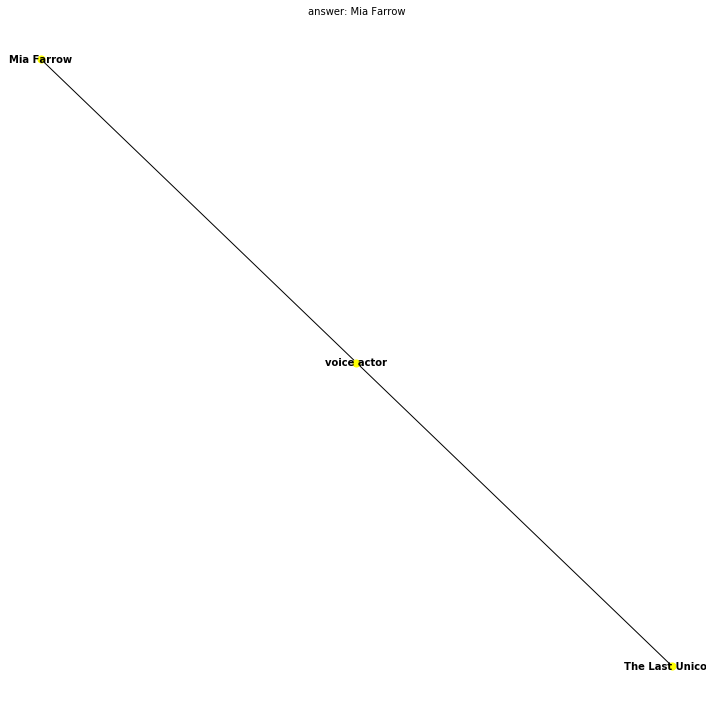

In [97]:
initial_question = "Which actor voiced the Unicorn in The Last Unicorn?"
print("Asking: ",str(initial_question))
result = cx.answer_complete_question(initial_question, cx.tagmeToken)
answer = str(cx.wd.wikidata_id_to_label(result['answers'][0]['answer']))
print("I think it is:",answer)
graph = cx.gp.expand_context_with_statements(None, [result['context']], qa=True) 
plot_graph(graph, "graph", answer)

In [55]:
graph.nodes()

NodeView(('Q176198', 'Q202725', 'P725-3157', 'Q108283', 'P725-3242', 'Q30060373', 'P453-2158', 'P725-3243', 'Q180338', 'P725-3244', 'Q30060676', 'P453-2159', 'Q1287983', 'P86-631', 'P86-632', 'Q7746145', 'P406-182', 'P406-189', 'P406-190', 'P406-191', 'Q157394', 'P136-18364', 'Q2143665', 'P136-18365', 'Q28968511', 'P136-18366', 'Q1983712', 'P57-632', 'Q1442364', 'P57-633', 'P57-634'))

Asking:  And Alan Arkin was behind...?
[{'answer': 'Q108283', 'answer_score': 0.5311839716030617, 'rank': 1}, {'answer': 'Q180338', 'answer_score': 0.625011672710064, 'rank': 2}, {'answer': 'Q30060373', 'answer_score': 0.7733727783175208, 'rank': 3}, {'answer': 'Q30060676', 'answer_score': 0.820286628871022, 'rank': 4}]
I think it is: Alan Arkin


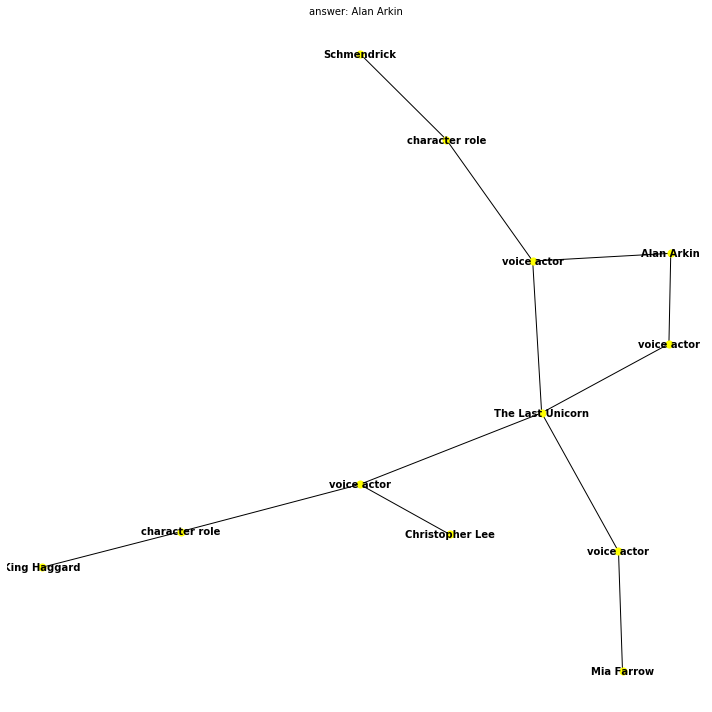

Asking:  Who is the composer of the soundtrack?
[{'answer': 'Q1287983', 'answer_score': 0.42267539027540474, 'rank': 1}, {'answer': 'Q7746145', 'answer_score': 0.4729630548217296, 'rank': 2}]
I think it is: Jimmy Webb


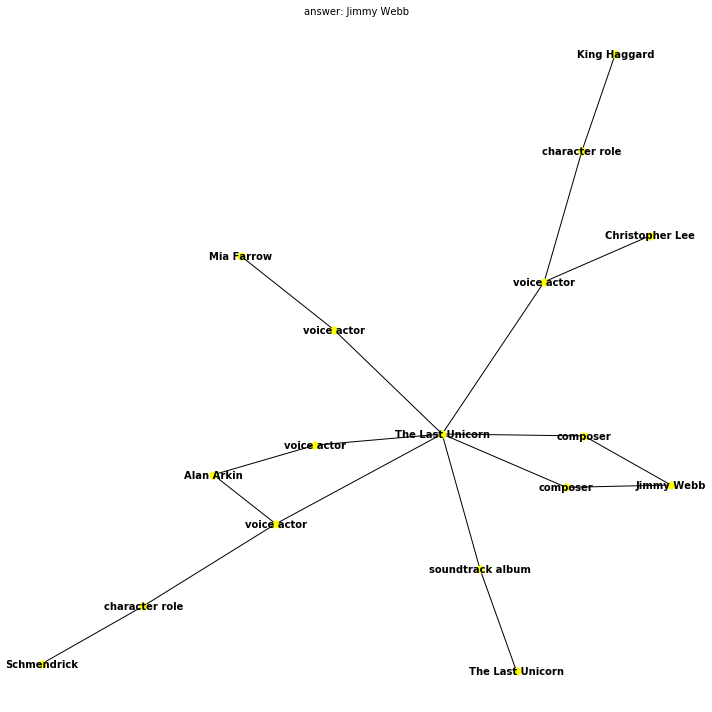

Asking:  So who performed the songs?
[{'answer': 'Q176198', 'answer_score': 0.23806461933884238, 'rank': 1}, {'answer': 'Q7746145', 'answer_score': 0.30473128600550903, 'rank': 2}, {'answer': 'Q108283', 'answer_score': 0.3927959053443514, 'rank': 3}, {'answer': 'Q180338', 'answer_score': 0.3927959053443514, 'rank': 3}, {'answer': 'Q202725', 'answer_score': 0.41362923867768475, 'rank': 5}, {'answer': 'Q1287983', 'answer_score': 0.41362923867768475, 'rank': 5}, {'answer': 'Q30060373', 'answer_score': 0.4764115483471059, 'rank': 7}, {'answer': 'Q30060676', 'answer_score': 0.4764115483471059, 'rank': 7}]
I think it is: The Last Unicorn


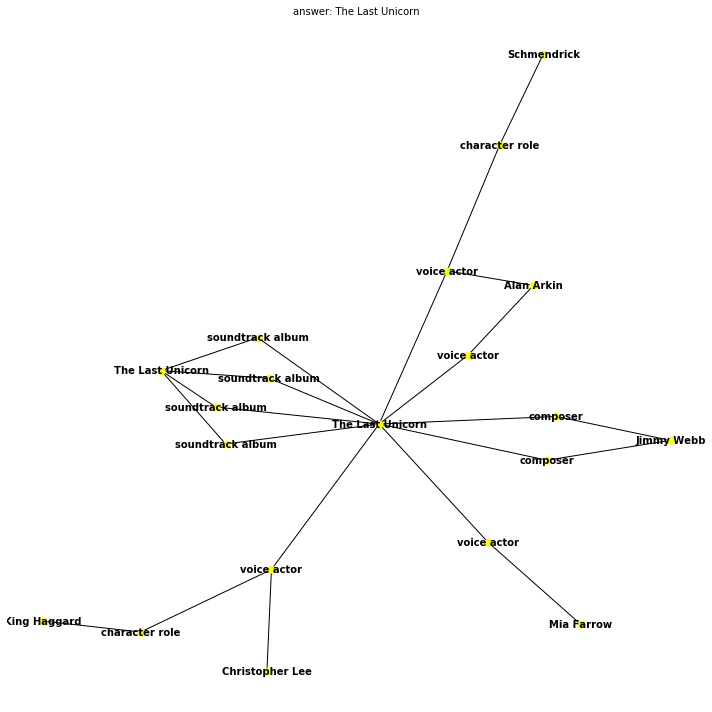

Asking:  Genre of this band's music?
[{'answer': 'Q157394', 'answer_score': 0.4251687636681184, 'rank': 1}, {'answer': 'Q2143665', 'answer_score': 0.4251687636681184, 'rank': 1}, {'answer': 'Q28968511', 'answer_score': 0.4251687636681184, 'rank': 1}]
I think it is: fantasy film


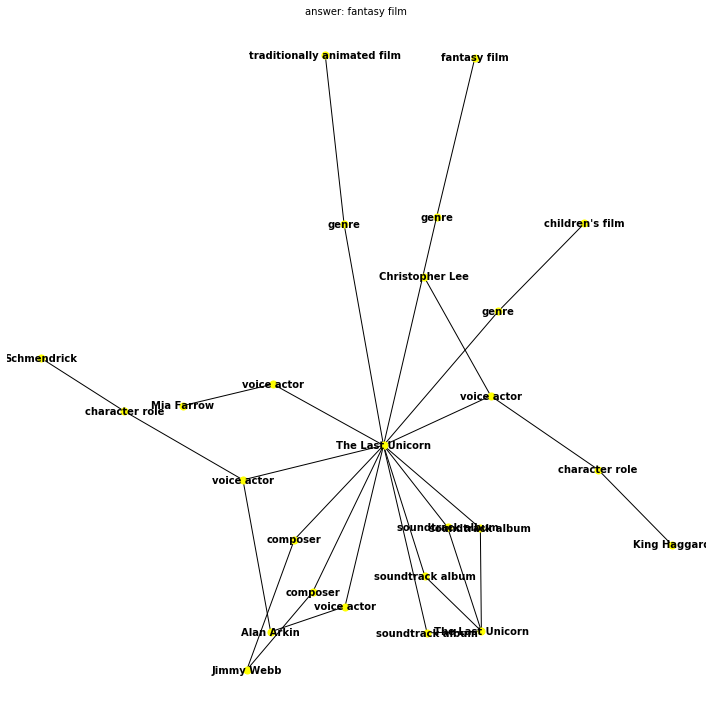

Asking:  By the way, who was the director?
[{'answer': 'Q1442364', 'answer_score': 0.34815345090946104, 'rank': 1}, {'answer': 'Q1983712', 'answer_score': 0.39216151060652327, 'rank': 2}]
I think it is: Jules Bass


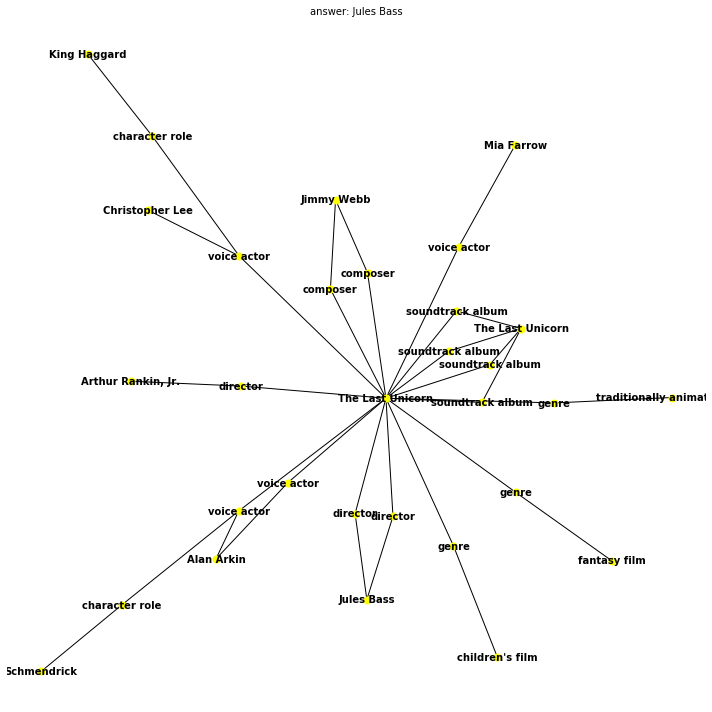

In [98]:
follow_up_questions = [ 
    "And Alan Arkin was behind...?",
    "Who is the composer of the soundtrack?",
    "So who performed the songs?",
    "Genre of this band's music?",
    "By the way, who was the director?"
                      ]
turn = 1
for next_question in follow_up_questions:
    turn += 1
    graph, answer = ask_following_question(graph, next_question, turn)
    plot_graph(graph, "graph", str(cx.wd.wikidata_id_to_label(answer[0]['answer'])))

In [19]:
[cx.wd.wikidata_id_to_label(n[0]) for n in cx.gp.get_all_qa_nodes(graph)]

['The Last Unicorn',
 'Mia Farrow',
 'Alan Arkin',
 'Schmendrick',
 'Christopher Lee',
 'King Haggard',
 'Jimmy Webb',
 'The Last Unicorn',
 'fantasy film',
 "children's film",
 'traditionally animated film',
 'Arthur Rankin, Jr.',
 'Jules Bass']

Asking:  The last Unicorn voice actor Mia Farrow character role the unicorn
I think it is: The Last Unicorn


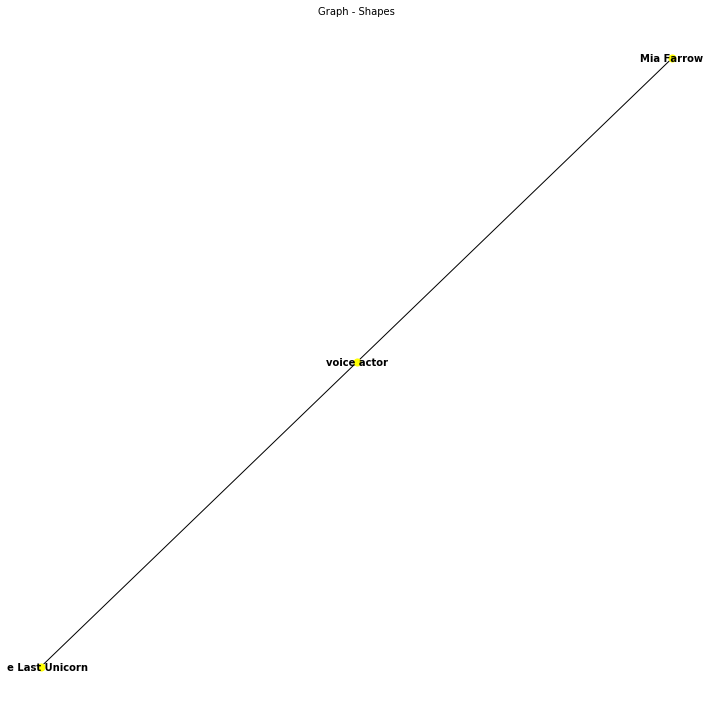

Asking:  And Alan Arkin was behind...?
[{'answer': 'Q108283', 'answer_score': 0.5311839716030617, 'rank': 1}, {'answer': 'Q180338', 'answer_score': 0.625011672710064, 'rank': 2}, {'answer': 'Q30060373', 'answer_score': 0.7733727783175208, 'rank': 3}, {'answer': 'Q30060676', 'answer_score': 0.820286628871022, 'rank': 4}]
I think it is: King Haggard


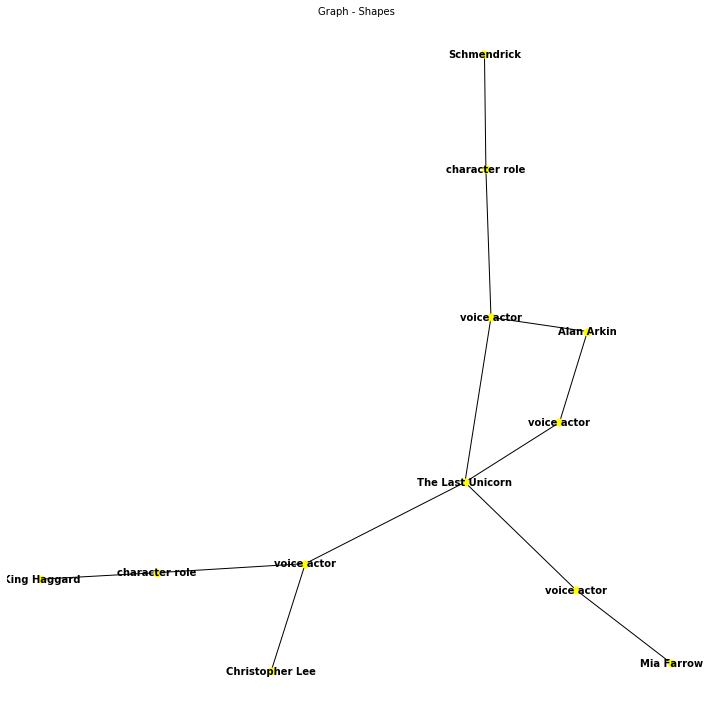

Asking:  Who did the score?
[{'answer': '21465', 'answer_score': 0.5173155096919291, 'rank': 1}, {'answer': '836', 'answer_score': 0.6259732645378937, 'rank': 2}]
I think it is: 836


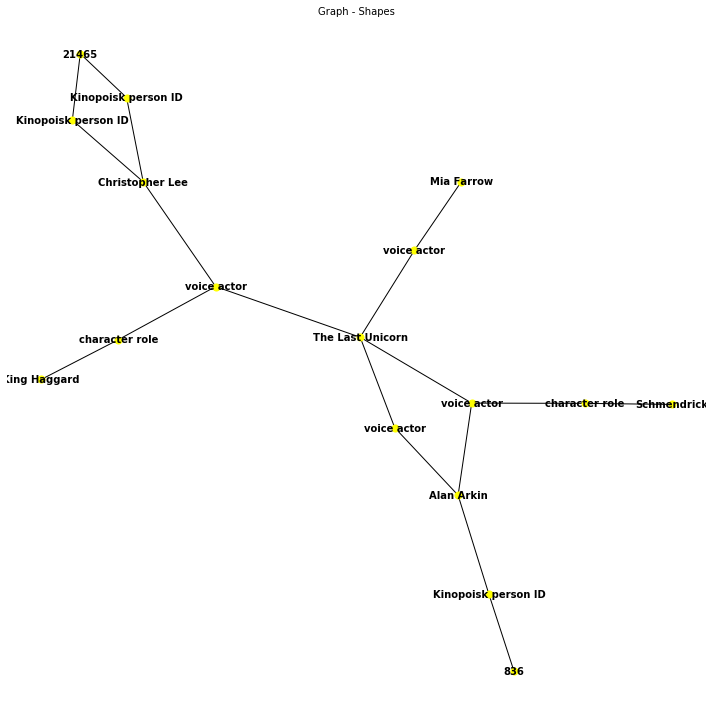

Asking:  So who performed the songs?
[{'answer': 'Q180338', 'answer_score': 0.353759948552798, 'rank': 1}, {'answer': 'Q176198', 'answer_score': 0.36034527159669094, 'rank': 2}, {'answer': 'Q108283', 'answer_score': 0.4252639279739172, 'rank': 3}, {'answer': '21465', 'answer_score': 0.45617860493002427, 'rank': 4}, {'answer': 'Q30060676', 'answer_score': 0.5163919125397567, 'rank': 5}, {'answer': 'Q202725', 'answer_score': 0.5342679073950365, 'rank': 6}, {'answer': 'Q30060373', 'answer_score': 0.5521439022503163, 'rank': 7}, {'answer': '836', 'answer_score': 0.5634345740617032, 'rank': 8}]
I think it is: 836


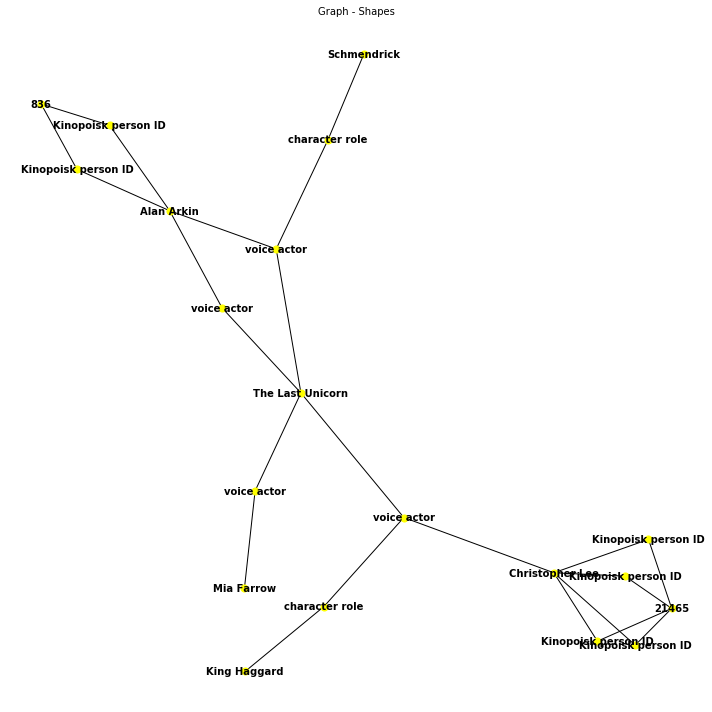

Asking:  Genre of this band's music?
[{'answer': 'Q157394', 'answer_score': 0.4402729303347851, 'rank': 1}, {'answer': 'Q2143665', 'answer_score': 0.4402729303347851, 'rank': 1}, {'answer': 'Q28968511', 'answer_score': 0.4402729303347851, 'rank': 1}]
I think it is: fantasy film


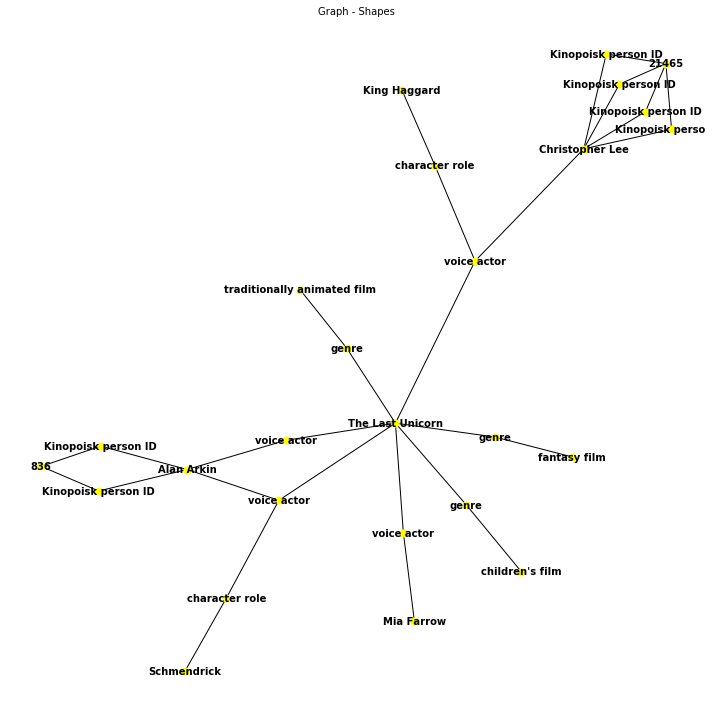

Asking:  By the way, who was the director?
[{'answer': 'Q1442364', 'answer_score': 0.35954739030340044, 'rank': 1}, {'answer': 'Q1983712', 'answer_score': 0.4033736318186445, 'rank': 2}]
I think it is: Arthur Rankin, Jr.


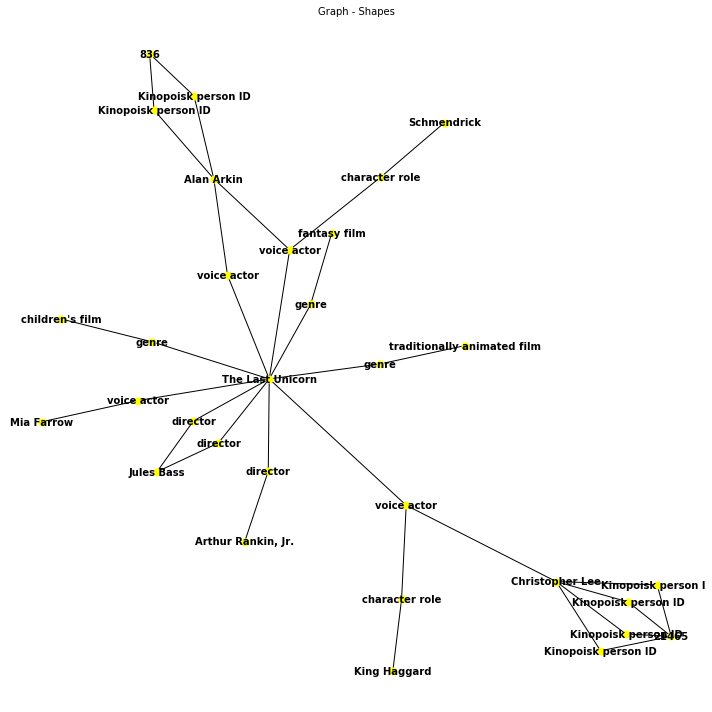

In [30]:
questions = [
    "The last Unicorn voice actor Mia Farrow character role the unicorn",
    "And Alan Arkin was behind...?",
    "Who did the score?",
    "So who performed the songs?",
    "Genre of this band's music?",
    "By the way, who was the director?"
]

turn = 1

print("Asking: ",str(questions[0]))
result = cx.answer_complete_question(questions[0], cx.tagmeToken)
print("I think it is:",str(cx.wd.wikidata_id_to_label(result['answers'][0]['answer'])))
graph = cx.gp.expand_context_with_statements(None, [result['context']], qa=True) 
plot_graph(graph, "graph")

for next_question in questions[1:]:
    turn += 1
    graph, answer = ask_following_question(graph, next_question, turn)
    plot_graph(graph, "graph")

In [45]:
import networkx as nx

In [82]:
# From paper
context = nx.Graph()

context.add_node("Q967268", type='entity', turn=1, qa=True) #The Last Unicorn
context.add_node("Q202725", type='entity', turn=1, qa=True) #Mia Farrow
context.add_node("Q30060419", type='entity', turn=1, qa=True) #The Unicorn

context.add_node("P725", type='predicate', turn=1) #voice actor
context.add_node("P453", type='predicate', turn=1) #character role

context.add_edge("Q967268", "P725") # The Last Unicorn -> voice actor
context.add_edge("P725", "Q202725") # voice actor -> Mia Farrow
context.add_edge("Q202725", "P453") # Mia Farrow -> character role
context.add_edge("P453", "Q30060419") # character role -> The Unicorn

In [83]:
# Custom
context = nx.Graph()

context.add_node("Q967268", type='entity', turn=1, qa=True) #The Last Unicorn
context.add_node("Q202725", type='entity', turn=1, qa=True) #Mia Farrow
context.add_node("Q30060419", type='entity', turn=1, qa=True) #The Unicorn

context.add_node("P725", type='predicate', turn=1) #voice actor
context.add_node("P175", type='predicate', turn=1) #performer

context.add_edge("Q967268", "P725") # The Last Unicorn -> voice actor
context.add_edge("P725", "Q202725") # voice actor -> Mia Farrow
context.add_edge("Q202725", "P175") # Mia Farrow -> performer
context.add_edge("P175", "Q30060419") # performer -> The Unicorn

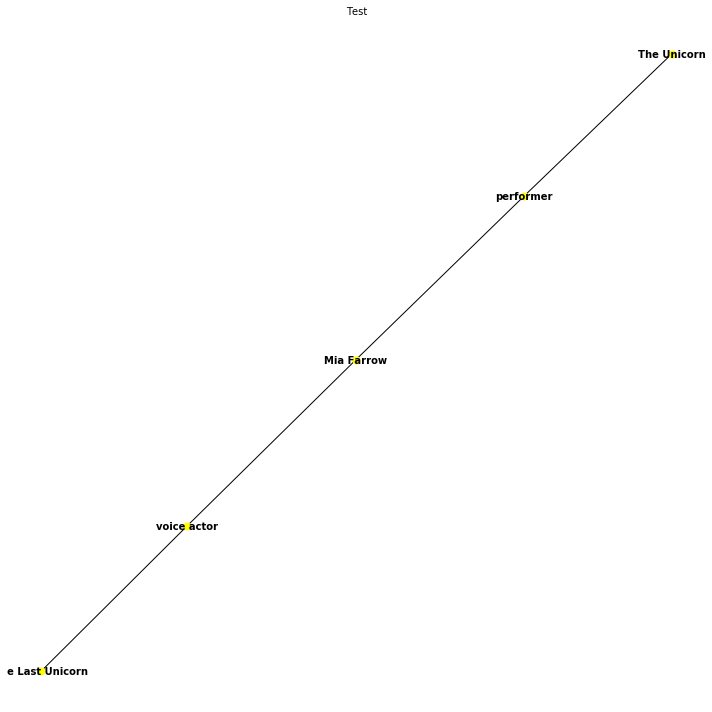

In [84]:
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)
ax.set_title(str("Test"), fontsize=10)
pos = nx.spring_layout(context)
nx.draw(context, pos, node_size=50, node_color='yellow', font_size=10, font_weight='bold', with_labels=True, labels=get_labels_from_graph(context))
plt.tight_layout()
#plt.savefig(str(name)+".png", format="PNG")
plt.show()

In [85]:
context.nodes(True)

NodeDataView({'Q967268': {'type': 'entity', 'turn': 1, 'qa': True}, 'Q202725': {'type': 'entity', 'turn': 1, 'qa': True}, 'Q30060419': {'type': 'entity', 'turn': 1, 'qa': True}, 'P725': {'type': 'predicate', 'turn': 1}, 'P175': {'type': 'predicate', 'turn': 1}})

In [86]:
graph.nodes(True)

NodeDataView({'Q176198': {'type': 'entity', 'turn': 1, 'qa': True}, 'Q202725': {'type': 'entity', 'turn': 1, 'qa': True}, 'P725-3666': {'type': 'predicate', 'turn': 1}})

Asking:  And Alan Arkin was behind...?
[{'answer': 'Q3182263', 'answer_score': 0.6163828496706679, 'rank': 1}, {'answer': 'Q215972', 'answer_score': 0.7345504082457457, 'rank': 2}, {'answer': 'Q3246821', 'answer_score': 0.7345504082457457, 'rank': 2}]
I think it is: John Paul Jones


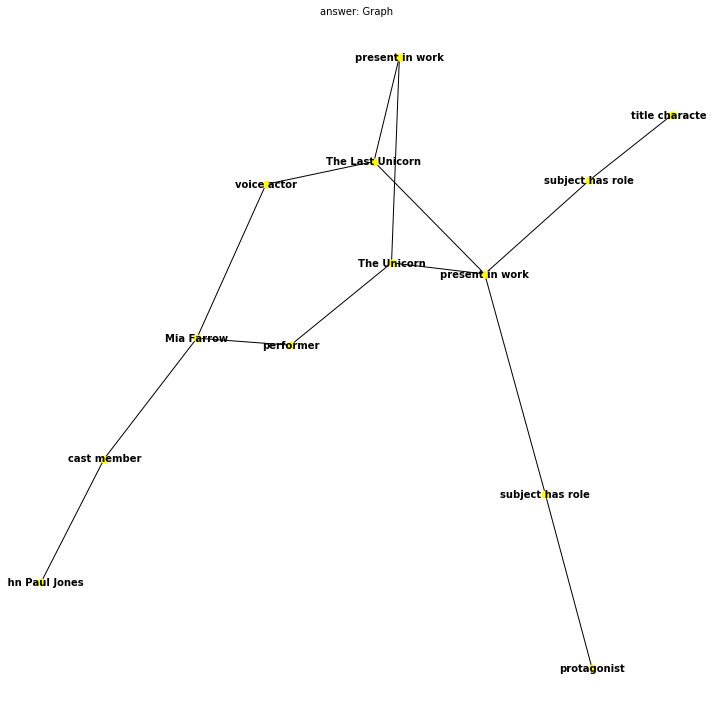

Asking:  Who is the composer of the soundtrack?
[{'answer': 'Q350704', 'answer_score': 0.5485402697675912, 'rank': 1}, {'answer': '27932', 'answer_score': 0.5862794947929, 'rank': 2}]
I think it is: Max Steiner


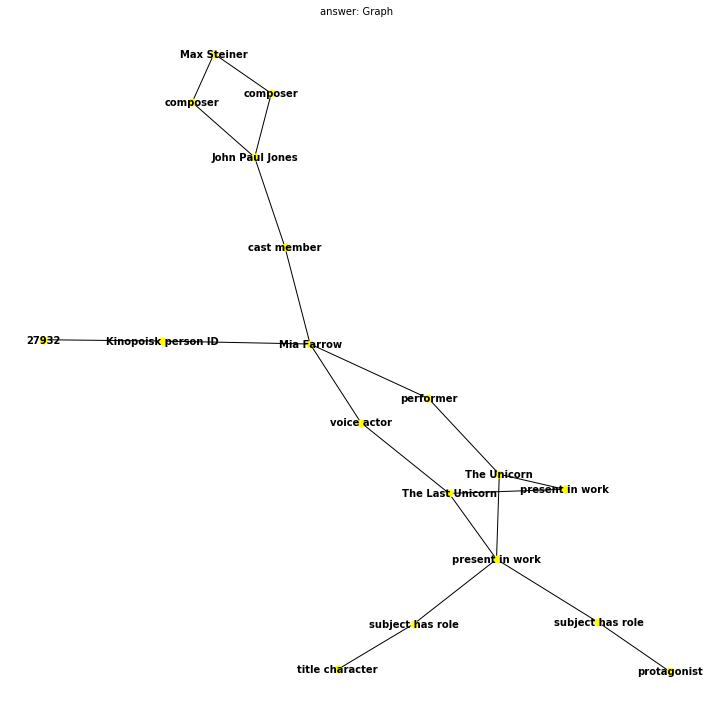

Asking:  So who performed the songs?
[{'answer': '547', 'answer_score': 0.4174044120994888, 'rank': 1}]
I think it is: 547


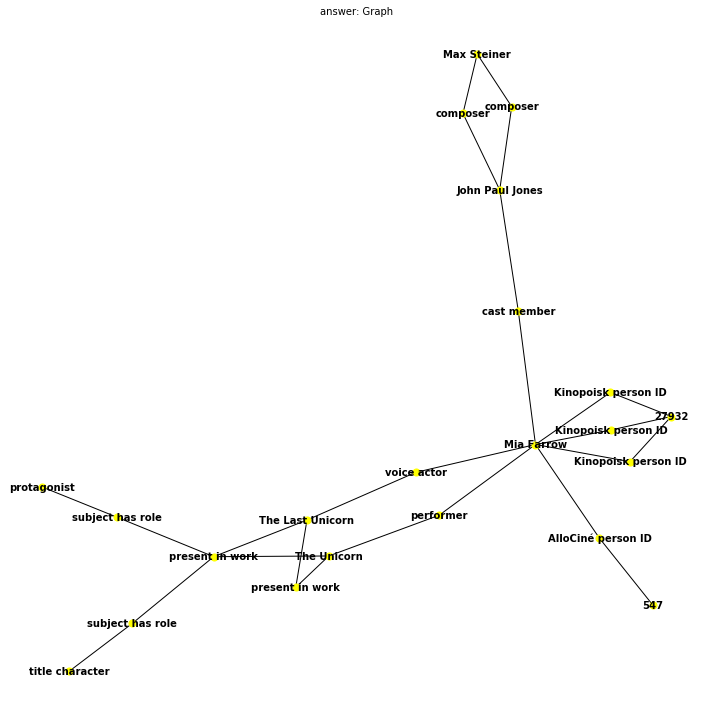

Asking:  Genre of this band's music?
[{'answer': 'Q10992055', 'answer_score': 0.44022663403848883, 'rank': 1}, {'answer': 'Q1350410', 'answer_score': 0.44022663403848883, 'rank': 1}, {'answer': 'Q8261', 'answer_score': 0.44022663403848883, 'rank': 1}]
I think it is: fantasy novel


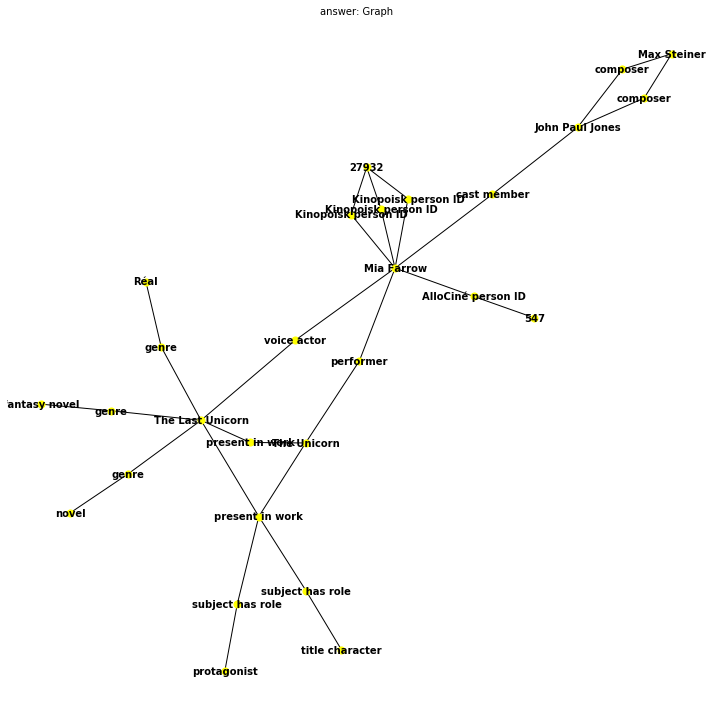

Asking:  By the way, who was the director?
[{'answer': 'Q547495', 'answer_score': 0.4353359613842098, 'rank': 1}, {'answer': 'Q4120752', 'answer_score': 0.5448482586494514, 'rank': 2}]
I think it is: John Farrow


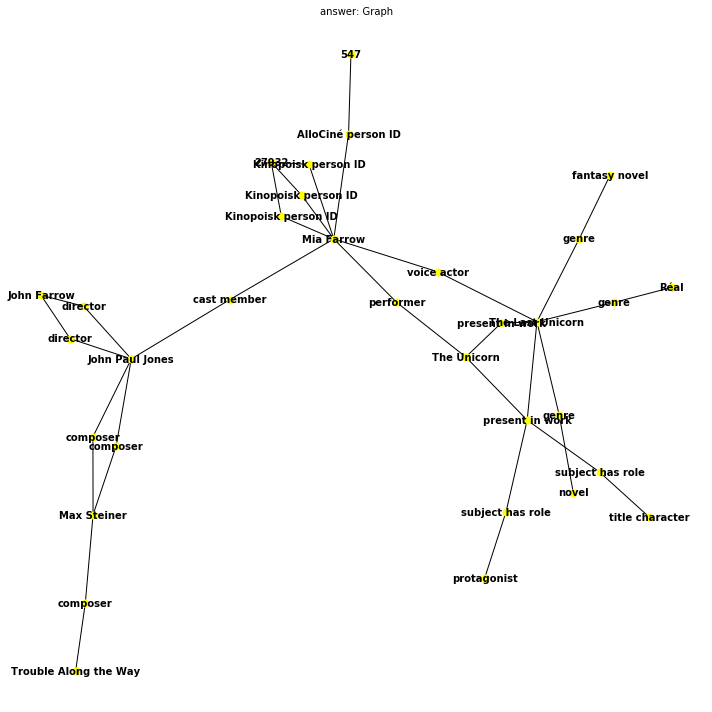

In [87]:
follow_up_questions = [ 
    "And Alan Arkin was behind...?",
    "Who is the composer of the soundtrack?",
    "So who performed the songs?",
    "Genre of this band's music?",
    "By the way, who was the director?"
                      ]
turn = 1
for next_question in follow_up_questions:
    turn += 1
    context, answer = ask_following_question(context, next_question, turn)
    plot_graph(context, "graph")